In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import os
from datetime import datetime, timedelta
from torch_geometric.utils import from_scipy_sparse_matrix

In [2]:
train_len = 36481
valid_len = 7817
window_len = 12 + 12 # 12 for history | 12 for future

start_ts = datetime.strptime('20170101T00:00:00', '%Y%m%dT%H:%M:%S')
timestamps = [start_ts + timedelta(minutes = 5 * train_len) + timedelta(minutes = 5 * i) for i in range(valid_len - window_len)]

In [3]:
data_folder = "../logs/2025-03-21_09-57-56_pems-bay_pred-60min_his-60min_centralized_online-training_individual-sensors/"

arr_A = np.genfromtxt(f"{data_folder}/y_pred_original.csv", delimiter=",").T
arr_B_21 = np.genfromtxt(f"{data_folder}/edge_analysis/y_pred_modified_node_21.csv", delimiter=",").T
arr_B_148 = np.genfromtxt(f"{data_folder}/edge_analysis/y_pred_modified_node_148.csv", delimiter=",").T
arr_B_247 = np.genfromtxt(f"{data_folder}/edge_analysis/y_pred_modified_node_247.csv", delimiter=",").T
arr_B_309 = np.genfromtxt(f"{data_folder}/edge_analysis/y_pred_modified_node_309.csv", delimiter=",").T
arr_B_310 = np.genfromtxt(f"{data_folder}/edge_analysis/y_pred_modified_node_310.csv", delimiter=",").T
arr_y = np.genfromtxt('../data/pems-bay/vel.csv', delimiter=',', skip_header = train_len+window_len-1, max_rows = valid_len-window_len).T

# arr_A, arr_A.shape
# arr_B_21[:,1:]
# arr_A[:,0], arr_A

In [4]:
with open(f"{data_folder}/edge_analysis/y_pred_modified_node_21.csv", 'r') as f:
    edge_headers_21 = f.readline().strip().split(',')

edge_number_21 = []
for edge_header_21 in edge_headers_21:
    edge_number_21.append(edge_header_21.split("_")[1])
# --------------------------------------------------------------------------------
with open(f"{data_folder}/edge_analysis/y_pred_modified_node_148.csv", 'r') as f:
    edge_headers_148 = f.readline().strip().split(',')

edge_number_148 = []
for edge_header_148 in edge_headers_148:
    edge_number_148.append(edge_header_148.split("_")[1])
# --------------------------------------------------------------------------------
with open(f"{data_folder}/edge_analysis/y_pred_modified_node_247.csv", 'r') as f:
    edge_headers_247 = f.readline().strip().split(',')

edge_number_247 = []
for edge_header_247 in edge_headers_247:
    edge_number_247.append(edge_header_247.split("_")[1])
# --------------------------------------------------------------------------------
with open(f"{data_folder}/edge_analysis/y_pred_modified_node_309.csv", 'r') as f:
    edge_headers_309 = f.readline().strip().split(',')

edge_number_309 = []
for edge_header_309 in edge_headers_309:
    edge_number_309.append(edge_header_309.split("_")[1])
# --------------------------------------------------------------------------------
with open(f"{data_folder}/edge_analysis/y_pred_modified_node_310.csv", 'r') as f:
    edge_headers_310 = f.readline().strip().split(',')

edge_number_310 = []
for edge_header_310 in edge_headers_310:
    edge_number_310.append(edge_header_310.split("_")[1])

In [6]:
df = pd.DataFrame(arr_y).melt(var_name = 'timestep', value_name = 'y', ignore_index = False)
df = df.reset_index(names = 'sensor')
df['timestamp'] = start_ts + timedelta(minutes=5 * train_len) + pd.to_timedelta(df.timestep * 5, unit='m')
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
df

,sensor,timestep,y,timestamp
0,0,0,71.1,2017-05-07 16:05:00
1,1,0,66.6,2017-05-07 16:05:00
2,2,0,65.4,2017-05-07 16:05:00
3,3,0,68.4,2017-05-07 16:05:00
4,4,0,68.2,2017-05-07 16:05:00
...,...,...,...,...
2532720,320,7792,60.2,2017-06-03 17:25:00
2532721,321,7792,65.3,2017-06-03 17:25:00
2532722,322,7792,67.4,2017-06-03 17:25:00
2532723,323,7792,72.5,2017-06-03 17:25:00


In [7]:
df_A = pd.DataFrame(arr_A[:,1:], index=arr_A[:,0], columns = timestamps).rename_axis(index = 'sensor')

df_B_21 = pd.DataFrame(arr_B_21[:,1:],index=edge_number_21, columns = timestamps).rename_axis(index = 'edge')
df_B_148 = pd.DataFrame(arr_B_148[:,1:],index=edge_number_148, columns = timestamps).rename_axis(index = 'edge')
df_B_247 = pd.DataFrame(arr_B_247[:,1:],index=edge_number_247, columns = timestamps).rename_axis(index = 'edge')
df_B_309 = pd.DataFrame(arr_B_309[:,1:],index=edge_number_309, columns = timestamps).rename_axis(index = 'edge')
df_B_310 = pd.DataFrame(arr_B_310[:,1:],index=edge_number_310, columns = timestamps).rename_axis(index = 'edge')

df_B_21

,2017-05-07 16:05:00,2017-05-07 16:10:00,2017-05-07 16:15:00,2017-05-07 16:20:00,2017-05-07 16:25:00,2017-05-07 16:30:00,2017-05-07 16:35:00,2017-05-07 16:40:00,2017-05-07 16:45:00,2017-05-07 16:50:00,...,2017-06-03 16:40:00,2017-06-03 16:45:00,2017-06-03 16:50:00,2017-06-03 16:55:00,2017-06-03 17:00:00,2017-06-03 17:05:00,2017-06-03 17:10:00,2017-06-03 17:15:00,2017-06-03 17:20:00,2017-06-03 17:25:00
edge,,,,,,,,,,,,,,,,,,,,,
182,64.520439,64.383316,64.503372,63.838234,64.045265,64.212341,64.612877,64.939957,65.329155,65.597168,...,60.376778,60.232300,60.312717,60.252804,61.222195,61.760017,62.118858,62.110874,61.928688,62.180740
455,64.521072,64.384415,64.504280,63.839577,64.046082,64.213577,64.613556,64.940254,65.329636,65.597420,...,60.377876,60.233593,60.313873,60.253693,61.222950,61.760746,62.119278,62.111496,61.929775,62.181919
771,64.520676,64.384247,64.504372,63.839172,64.046089,64.212914,64.613487,64.940285,65.329277,65.597359,...,60.376812,60.232838,60.313168,60.252815,61.222237,61.760010,62.118885,62.110924,61.928967,62.180866
1014,64.520096,64.383194,64.503632,63.838707,64.045601,64.212540,64.613113,64.940063,65.329216,65.597099,...,60.376381,60.232269,60.312752,60.252945,61.222237,61.760075,62.118958,62.110973,61.928814,62.180698
1104,64.521851,64.385170,64.504845,63.840328,64.046577,64.213928,64.613747,64.940613,65.329605,65.597702,...,60.378319,60.234318,60.314548,60.254192,61.223133,61.761089,62.119480,62.111561,61.929878,62.182041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36446,64.521446,64.384850,64.504547,63.839981,64.046318,64.213669,64.613411,64.940125,65.329376,65.597252,...,60.378223,60.233795,60.314117,60.254185,61.223057,61.760719,62.119270,62.111507,61.929901,62.181999
36613,64.521782,64.385185,64.504807,63.840271,64.046532,64.213928,64.613708,64.940628,65.329613,65.597710,...,60.378460,60.234550,60.315113,60.254692,61.223484,61.761265,62.119656,62.111927,61.930222,62.182266
38215,64.521858,64.385017,64.504822,63.840221,64.046501,64.214088,64.613785,64.940575,65.329628,65.597664,...,60.378376,60.234261,60.314442,60.254250,61.223099,61.760853,62.119400,62.111538,61.929932,62.182030


In [8]:
selected_sensors = arr_A[:,0]
subset_df = df[df['sensor'].isin(selected_sensors)]
df_y = pd.DataFrame(arr_y, columns=timestamps).rename_axis(index='sensor').loc[selected_sensors]

df_y

,2017-05-07 16:05:00,2017-05-07 16:10:00,2017-05-07 16:15:00,2017-05-07 16:20:00,2017-05-07 16:25:00,2017-05-07 16:30:00,2017-05-07 16:35:00,2017-05-07 16:40:00,2017-05-07 16:45:00,2017-05-07 16:50:00,...,2017-06-03 16:40:00,2017-06-03 16:45:00,2017-06-03 16:50:00,2017-06-03 16:55:00,2017-06-03 17:00:00,2017-06-03 17:05:00,2017-06-03 17:10:00,2017-06-03 17:15:00,2017-06-03 17:20:00,2017-06-03 17:25:00
sensor,,,,,,,,,,,,,,,,,,,,,
247,64.5,64.2,64.2,64.5,64.5,63.4,64.2,63.6,63.5,64.6,...,63.8,64.6,63.7,63.1,63.4,63.4,64.1,64.9,65.8,66.0
21,65.3,66.1,66.1,65.5,64.6,65.5,65.6,66.2,66.6,66.1,...,61.3,61.9,61.1,60.6,61.3,60.5,61.4,61.0,60.8,60.8
148,67.6,67.5,67.6,67.5,67.7,67.7,67.7,67.8,67.8,67.7,...,67.4,67.5,67.6,67.6,67.7,67.7,67.7,67.8,67.6,67.7
309,69.4,69.9,70.0,69.4,68.0,68.6,68.8,68.5,68.7,69.4,...,66.8,66.9,67.9,68.1,68.3,70.0,69.7,69.4,69.2,69.3
310,65.4,65.4,66.4,66.6,64.8,65.0,65.9,65.5,64.6,63.7,...,65.5,65.7,64.4,64.3,63.9,64.3,64.9,65.3,64.7,63.6


In [9]:
def calculate_edge_scores(sensor_id, df_B_node):
    d_original = abs(df_A.loc[sensor_id] - df_y.loc[sensor_id])

    edge_scores = {}
    for edge_id, edge_preds in df_B_node.iterrows():
        d_modified = abs(edge_preds - df_y.loc[sensor_id])
        edge_score = (d_original - d_modified).sum()  # Sum of error differences
        edge_scores[edge_id] = edge_score
    
    return pd.Series(edge_scores, name=f"sensor_{sensor_id}_edge_scores")

edge_scores_21 = calculate_edge_scores(21, df_B_21)
edge_scores_148 = calculate_edge_scores(148, df_B_148)
edge_scores_247 = calculate_edge_scores(247, df_B_247)
edge_scores_309 = calculate_edge_scores(309, df_B_309)
edge_scores_310 = calculate_edge_scores(310, df_B_310)

edge_scores_21

182      6.109472
455      4.187599
771      3.973577
1014     6.941921
1104     3.412309
           ...   
36446    2.904470
36613    3.096519
38215    2.461561
38552    2.509760
38723    2.264078
Name: sensor_21_edge_scores, Length: 87, dtype: float64

()

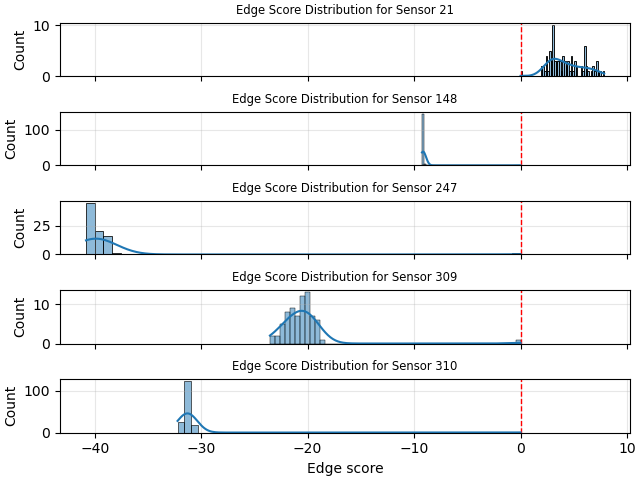

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex = True, layout = 'constrained')
ax1.set_title('Edge Score Distribution for Sensor 21', size = 'small')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3)
ax1.axvline(0, color='red', linestyle='--', linewidth=1)
sns.histplot(data=edge_scores_21, ax=ax1, bins=50, kde=True)

ax2.set_title('Edge Score Distribution for Sensor 148', size = 'small')
ax2.set_ylabel('Count')
ax2.grid(True, alpha=0.3)
ax2.axvline(0, color='red', linestyle='--', linewidth=1)
sns.histplot(data=edge_scores_148, ax=ax2, bins=50, kde=True)

ax3.set_title('Edge Score Distribution for Sensor 247', size = 'small')
ax3.set_ylabel('Count')
ax3.grid(True, alpha=0.3)
ax3.axvline(0, color='red', linestyle='--', linewidth=1)
sns.histplot(data=edge_scores_247, ax=ax3, bins=50, kde=True)

ax4.set_title('Edge Score Distribution for Sensor 309', size = 'small')
ax4.set_ylabel('Count')
ax4.grid(True, alpha=0.3)
ax4.axvline(0, color='red', linestyle='--', linewidth=1)
sns.histplot(data=edge_scores_309, ax=ax4, bins=50, kde=True)

ax5.set_title('Edge Score Distribution for Sensor 310', size = 'small')
ax5.set_ylabel('Count')
ax5.set_xlabel("Edge score")
ax5.grid(True, alpha=0.3)
ax5.axvline(0, color='red', linestyle='--', linewidth=1)
sns.histplot(data=edge_scores_310, ax=ax5, bins=50, kde=True)
()

In [11]:
dataset_name = "pems-bay"
adj_file_name = "adj.npz"

dataset_path = '../data'
dataset_path = os.path.join(dataset_path, dataset_name)
adj = sp.load_npz(os.path.join(dataset_path, adj_file_name)) # dimensions: (207, 207)
adj = adj.tocsc() # convert adj from compressed sparse row (CSR) to compressed sparse column format (CSC)

edge_index, edge_weight = from_scipy_sparse_matrix(adj)
print(f"{edge_weight}")
print(f"{len(edge_weight)}")

edge_weights = pd.Series(edge_weight.numpy(), name='weight')

def prepare_edge_score_data(edge_scores):
    """Combine edge scores with edge weights using the edge IDs from scores index"""
    # Create DataFrame from edge scores
    scores_df = edge_scores.reset_index()
    scores_df.columns = ['edge_str', 'score']

    scores_df['edge_id'] = scores_df['edge_str'].str.extract('(\d+)').astype(int)

    scores_df = scores_df.merge(
        edge_weights.reset_index(),
        left_on='edge_id',
        right_on='index'
    ).drop(columns=['index', 'edge_str'])
    
    return scores_df

all_edges = pd.concat([
    prepare_edge_score_data(edge_scores_21).assign(sensor=21),
    prepare_edge_score_data(edge_scores_148).assign(sensor=148),
    prepare_edge_score_data(edge_scores_247).assign(sensor=247),
    prepare_edge_score_data(edge_scores_309).assign(sensor=309),
    prepare_edge_score_data(edge_scores_310).assign(sensor=310)
])

tensor([1.0000, 0.9817, 0.1059,  ..., 0.8129, 0.9001, 1.0000],
       dtype=torch.float64)
38887


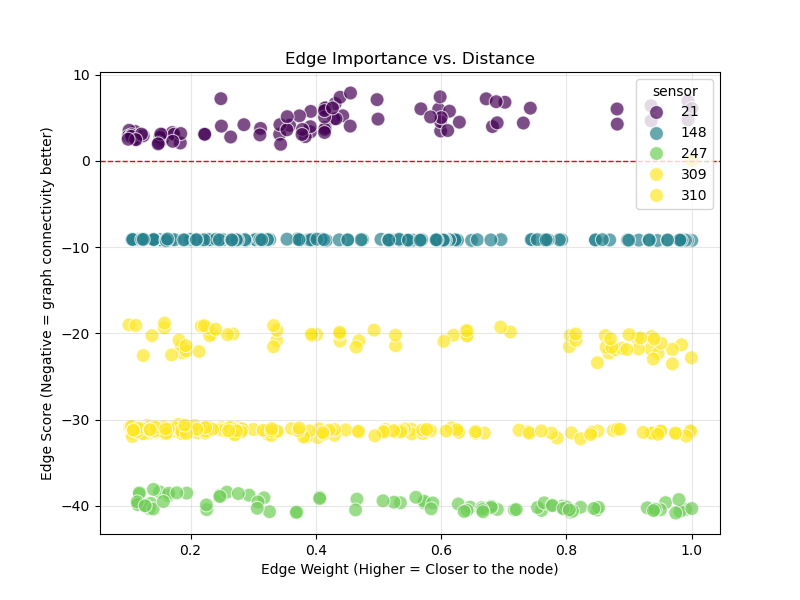

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=all_edges,
    x='weight',
    y='score',
    hue='sensor',
    palette='viridis',
    alpha=0.7,
    s=100
)

plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Edge Importance vs. Distance')
plt.xlabel('Edge Weight (Higher = Closer to the node)')
plt.ylabel('Edge Score (Negative = graph connectivity better)')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
data_folder = "../logs/2025-04-02_18-14-50_pems-bay_pred-60min_his-60min_centralized_online-training_individual-sensors/"

arr_A = np.genfromtxt(f"{data_folder}/y_pred_original.csv", delimiter=",").T
arr_B_2 = np.genfromtxt(f"{data_folder}/edge_analysis/y_pred_modified_node_2.csv", delimiter=",").T
arr_B_51 = np.genfromtxt(f"{data_folder}/edge_analysis/y_pred_modified_node_51.csv", delimiter=",").T
arr_B_99 = np.genfromtxt(f"{data_folder}/edge_analysis/y_pred_modified_node_99.csv", delimiter=",").T
arr_B_203 = np.genfromtxt(f"{data_folder}/edge_analysis/y_pred_modified_node_203.csv", delimiter=",").T
arr_B_303 = np.genfromtxt(f"{data_folder}/edge_analysis/y_pred_modified_node_303.csv", delimiter=",").T
arr_y = np.genfromtxt('../data/pems-bay/vel.csv', delimiter=',', skip_header = train_len+window_len-1, max_rows = valid_len-window_len).T


In [14]:
with open(f"{data_folder}/edge_analysis/y_pred_modified_node_2.csv", 'r') as f:
    edge_headers_2 = f.readline().strip().split(',')

edge_number_2 = []
for edge_header_2 in edge_headers_2:
    edge_number_2.append(edge_header_2.split("_")[2])
# --------------------------------------------------------------------------------
with open(f"{data_folder}/edge_analysis/y_pred_modified_node_51.csv", 'r') as f:
    edge_headers_51 = f.readline().strip().split(',')

edge_number_51 = []
for edge_header_51 in edge_headers_51:
    edge_number_51.append(edge_header_51.split("_")[2])
# --------------------------------------------------------------------------------
with open(f"{data_folder}/edge_analysis/y_pred_modified_node_99.csv", 'r') as f:
    edge_headers_99 = f.readline().strip().split(',')

edge_number_99 = []
for edge_header_99 in edge_headers_99:
    edge_number_99.append(edge_header_99.split("_")[2])
# --------------------------------------------------------------------------------
with open(f"{data_folder}/edge_analysis/y_pred_modified_node_203.csv", 'r') as f:
    edge_headers_203 = f.readline().strip().split(',')

edge_number_203 = []
for edge_header_203 in edge_headers_203:
    edge_number_203.append(edge_header_203.split("_")[2])
# --------------------------------------------------------------------------------
with open(f"{data_folder}/edge_analysis/y_pred_modified_node_303.csv", 'r') as f:
    edge_headers_303 = f.readline().strip().split(',')

edge_number_303 = []
for edge_header_303 in edge_headers_303:
    edge_number_303.append(edge_header_303.split("_")[2])

In [15]:
df_A = pd.DataFrame(arr_A[:,1:], index=arr_A[:,0], columns = timestamps).rename_axis(index = 'sensor')

df_B_2 = pd.DataFrame(arr_B_2[:,1:],index=edge_number_2, columns = timestamps).rename_axis(index = 'edge')
df_B_51 = pd.DataFrame(arr_B_51[:,1:],index=edge_number_51, columns = timestamps).rename_axis(index = 'edge')
df_B_99 = pd.DataFrame(arr_B_99[:,1:],index=edge_number_99, columns = timestamps).rename_axis(index = 'edge')
df_B_203 = pd.DataFrame(arr_B_203[:,1:],index=edge_number_203, columns = timestamps).rename_axis(index = 'edge')
df_B_303 = pd.DataFrame(arr_B_303[:,1:],index=edge_number_303, columns = timestamps).rename_axis(index = 'edge')

df_B_2

,2017-05-07 16:05:00,2017-05-07 16:10:00,2017-05-07 16:15:00,2017-05-07 16:20:00,2017-05-07 16:25:00,2017-05-07 16:30:00,2017-05-07 16:35:00,2017-05-07 16:40:00,2017-05-07 16:45:00,2017-05-07 16:50:00,...,2017-06-03 16:40:00,2017-06-03 16:45:00,2017-06-03 16:50:00,2017-06-03 16:55:00,2017-06-03 17:00:00,2017-06-03 17:05:00,2017-06-03 17:10:00,2017-06-03 17:15:00,2017-06-03 17:20:00,2017-06-03 17:25:00
edge,,,,,,,,,,,,,,,,,,,,,
1.0-0.9,64.248421,64.153343,63.941231,63.238041,63.088177,62.933247,63.069305,63.062344,63.364990,63.733593,...,63.469841,63.426651,63.393814,63.384251,63.351795,63.945240,64.583748,64.799126,65.374695,65.686035
0.9-0.8,64.313507,64.227089,64.001663,63.290226,63.140820,63.007282,63.161766,63.161194,63.437222,63.814442,...,63.465145,63.434628,63.409332,63.390289,63.344814,63.947445,64.581360,64.795296,65.380371,65.678101
0.8-0.7,64.335060,64.250443,64.024963,63.299072,63.143250,62.999615,63.149803,63.148014,63.427784,63.806675,...,63.465752,63.429184,63.401806,63.385303,63.342426,63.949375,64.588852,64.810280,65.400536,65.702362
0.7-0.6,64.351814,64.263527,64.029144,63.303886,63.135517,62.987747,63.138165,63.139385,63.424927,63.808212,...,63.460358,63.422672,63.394531,63.372345,63.320808,63.925690,64.563812,64.783508,65.371841,65.674812
0.6-0.5,64.220078,64.112419,63.896961,63.212719,63.050205,62.909523,63.047695,63.051060,63.369724,63.737167,...,63.412697,63.375786,63.345753,63.324688,63.268269,63.869545,64.503754,64.724609,65.315857,65.622192
0.5-0.4,64.149345,64.064140,63.876766,63.168617,63.066536,62.965321,63.134129,63.156914,63.428982,63.795948,...,63.452190,63.407135,63.366589,63.352947,63.306705,63.883400,64.509247,64.722633,65.304657,65.619370
0.4-0.3,64.319786,64.229134,64.002945,63.291183,63.148872,63.015194,63.175671,63.195076,63.452469,63.825703,...,63.438610,63.403019,63.373295,63.351974,63.288902,63.880638,64.502510,64.713921,65.300896,65.609993
0.3-0.2,64.392677,64.296516,64.062767,63.327332,63.184151,63.057251,63.224747,63.256142,63.507141,63.899948,...,63.458401,63.424377,63.402378,63.373760,63.324509,63.940308,64.581955,64.810013,65.406944,65.707878
0.2-0.1,64.341225,64.257393,64.000381,63.251148,63.096870,62.946770,63.077351,63.124073,63.426655,63.818768,...,63.488098,63.428059,63.394897,63.355225,63.261719,63.888836,64.535164,64.765999,65.382439,65.700157


In [16]:
selected_sensors = arr_A[:,0]
subset_df = df[df['sensor'].isin(selected_sensors)]
df_y = pd.DataFrame(arr_y, columns=timestamps).rename_axis(index='sensor').loc[selected_sensors]

df_y

,2017-05-07 16:05:00,2017-05-07 16:10:00,2017-05-07 16:15:00,2017-05-07 16:20:00,2017-05-07 16:25:00,2017-05-07 16:30:00,2017-05-07 16:35:00,2017-05-07 16:40:00,2017-05-07 16:45:00,2017-05-07 16:50:00,...,2017-06-03 16:40:00,2017-06-03 16:45:00,2017-06-03 16:50:00,2017-06-03 16:55:00,2017-06-03 17:00:00,2017-06-03 17:05:00,2017-06-03 17:10:00,2017-06-03 17:15:00,2017-06-03 17:20:00,2017-06-03 17:25:00
sensor,,,,,,,,,,,,,,,,,,,,,
303,33.9,34.0,34.6,36.1,33.3,33.4,33.2,33.5,36.6,33.4,...,58.1,59.1,58.5,58.7,59.3,59.1,59.1,59.4,60.6,58.8
2,65.4,67.0,67.1,63.7,63.7,63.0,65.1,65.1,64.5,65.1,...,66.4,65.2,67.8,67.6,68.4,66.5,66.1,67.0,64.5,62.0
99,65.2,65.5,65.7,65.5,64.1,64.5,64.9,65.1,65.4,64.8,...,67.9,67.9,67.6,67.4,68.0,67.7,68.0,68.4,68.2,66.5
203,64.4,64.1,64.6,63.8,63.5,63.0,63.6,64.0,63.6,64.6,...,63.9,63.2,64.6,64.3,65.3,64.3,64.7,64.7,64.5,63.1
51,67.6,69.2,69.9,70.5,68.5,68.7,67.9,69.0,68.8,68.3,...,67.5,66.7,66.5,66.7,67.0,68.5,68.3,68.6,69.0,68.3


In [17]:
def calculate_edge_scores(sensor_id, df_B_node):
    d_original = abs(df_A.loc[sensor_id] - df_y.loc[sensor_id])

    edge_scores = {}
    for edge_id, edge_preds in df_B_node.iterrows():
        d_modified = abs(edge_preds - df_y.loc[sensor_id])
        edge_score = (d_original - d_modified).sum()  # Sum of error differences
        edge_scores[edge_id] = edge_score
    
    return pd.Series(edge_scores, name=f"sensor_{sensor_id}_edge_scores")

edge_scores_2 = calculate_edge_scores(2, df_B_2)
edge_scores_51 = calculate_edge_scores(51, df_B_51)
edge_scores_99 = calculate_edge_scores(99, df_B_99)
edge_scores_203 = calculate_edge_scores(203, df_B_203)
edge_scores_303 = calculate_edge_scores(303, df_B_303)

edge_scores_2

1.0-0.9    119.120272
0.9-0.8    -13.068799
0.8-0.7    -62.096996
0.7-0.6   -111.134998
0.6-0.5    107.523094
0.5-0.4    149.955788
0.4-0.3     73.104671
0.3-0.2   -168.348747
0.2-0.1    -14.982075
0.1-0.0      0.003796
Name: sensor_2_edge_scores, dtype: float64

In [18]:
dataset_name = "pems-bay"
adj_file_name = "adj.npz"

dataset_path = '../data'
dataset_path = os.path.join(dataset_path, dataset_name)
adj = sp.load_npz(os.path.join(dataset_path, adj_file_name)) # dimensions: (207, 207)
adj = adj.tocsc() # convert adj from compressed sparse row (CSR) to compressed sparse column format (CSC)

edge_index, edge_weight = from_scipy_sparse_matrix(adj)

edge_weights = pd.Series(edge_weight.numpy(), name='weight')
weight_groups = ['1.0-0.9', '0.9-0.8', '0.8-0.7', '0.7-0.6', '0.6-0.5', '0.5-0.4', '0.4-0.3', '0.3-0.2', '0.2-0.1', '0.1-0.0']
weight_categories = pd.DataFrame({
    'weight_category': weight_groups
})

def prepare_edge_score_data(edge_scores):
    # Create DataFrame from edge scores
    scores_df = edge_scores.reset_index()
    scores_df.columns = ['edge_str', 'score']

    scores_df['weight_category'] = scores_df['edge_str'].apply(
        lambda x: f"{float(x.split('-')[0]):.1f}-{float(x.split('-')[1]):.1f}"
    )

    return scores_df.merge(
        weight_categories,
        on='weight_category',
        how='left'  # keeps all score entries even if no category match
    )

all_edges = pd.concat([
    prepare_edge_score_data(edge_scores_2).assign(sensor=2),
    prepare_edge_score_data(edge_scores_51).assign(sensor=51),
    prepare_edge_score_data(edge_scores_99).assign(sensor=99),
    prepare_edge_score_data(edge_scores_203).assign(sensor=203),
    prepare_edge_score_data(edge_scores_303).assign(sensor=303)
])

all_edges

,edge_str,score,weight_category,sensor
0,1.0-0.9,119.120272,1.0-0.9,2
1,0.9-0.8,-13.068799,0.9-0.8,2
2,0.8-0.7,-62.096996,0.8-0.7,2
3,0.7-0.6,-111.134998,0.7-0.6,2
4,0.6-0.5,107.523094,0.6-0.5,2
5,0.5-0.4,149.955788,0.5-0.4,2
6,0.4-0.3,73.104671,0.4-0.3,2
7,0.3-0.2,-168.348747,0.3-0.2,2
8,0.2-0.1,-14.982075,0.2-0.1,2
9,0.1-0.0,0.003796,0.1-0.0,2


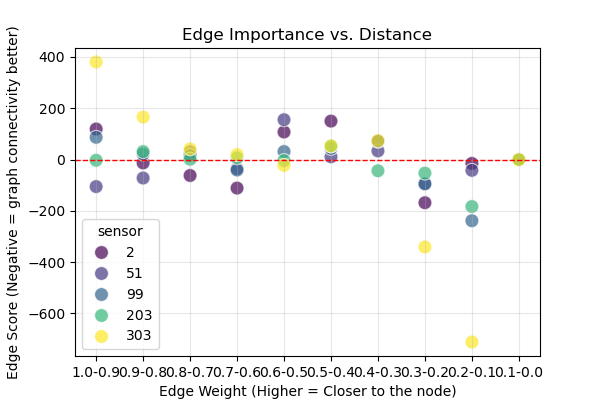

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=all_edges,
    x='weight_category',
    y='score',
    hue='sensor',
    palette='viridis',
    alpha=0.7,
    s=100
)

plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Edge Importance vs. Distance')
plt.xlabel('Edge Weight (Higher = Closer to the node)')
plt.ylabel('Edge Score (Negative = graph connectivity better)')
plt.grid(True, alpha=0.3)
plt.show()